# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## Part (a)

In [5]:
# Load the data
crsp = pd.read_csv("crsp_1926_2020.csv")

# Convert column names to lowercase
crsp.columns = crsp.columns.str.lower()

# Only include stocks that are ordinary/common shares (shrcd = 10 or 11)
crsp = crsp[crsp['shrcd'].isin([10, 11])]

# Only include stocks listed on the NYSE, AMEX, or NASDAQ (exchcd = 1, 2, 3)
crsp = crsp[crsp['exchcd'].isin([1, 2, 3])]

# Set negative prices to NA (prc < 0)
crsp.loc[crsp['prc'] < 0, 'prc'] = pd.NA

# Show first few data points
print(crsp.head())

   permno        date  shrcd  exchcd  prc        ret  shrout
1   10000  1986-01-31   10.0     3.0  NaN          C  3680.0
2   10000  1986-02-28   10.0     3.0  NaN  -0.257143  3680.0
3   10000  1986-03-31   10.0     3.0  NaN   0.365385  3680.0
4   10000  1986-04-30   10.0     3.0  NaN  -0.098592  3793.0
5   10000  1986-05-30   10.0     3.0  NaN  -0.222656  3793.0


## Part (b)

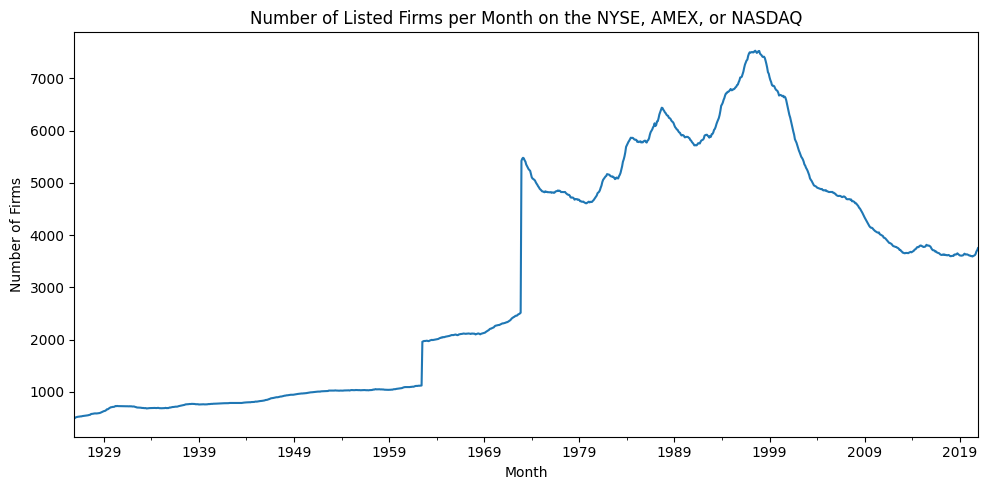

In [11]:
# Convert date to datetime and extract month
crsp['date'] = pd.to_datetime(crsp['date'], errors='coerce')
crsp['month'] = crsp['date'].dt.to_period('M')

# Count number of unique firms (permno) per month
monthly_firm_counts = crsp.groupby('month')['permno'].nunique()

# Plot
monthly_firm_counts.plot(
    title="Number of Listed Firms per Month on the NYSE, AMEX, or NASDAQ", 
                         figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Firms")
plt.tight_layout()
plt.show()